<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Module 4: Example with fully connected neural networks - Overfitting

In this notebook, we will see examples related to the overfitting of networks and how to prevent and/or try to solve it. To see these concepts, we'll use the IMDB dataset, which consists of 25000 movie reviews (https://keras.io/api/datasets/imdb/).

In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Next, we'll create our model, that witll consist of 2 hidden layers with 16 neurons and a layer with a single output neuron which will tell if the movie is good or bad. We'll use the `RMSprop` optimiser and the `binary_crossentropy` function, since we're dealing with a binary problem.

In [2]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

/Users/robert/22.418/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.8133 - loss: 0.4683 - val_acc: 0.8324 - val_loss: 0.3989
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9030 - loss: 0.2801 - val_acc: 0.8880 - val_loss: 0.2909
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9228 - loss: 0.2161 - val_acc: 0.8878 - val_loss: 0.2801
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9348 - loss: 0.1829 - val_acc: 0.8786 - val_loss: 0.3008
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9435 - loss: 0.1574 - val_acc: 0.8820 - val_loss: 0.2993
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9508 - loss: 0.1421 - val_acc: 0.8731 - val_loss: 0.3357
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9557 - loss: 0.1266 - val_acc: 0.8760 - val_loss: 0.3310
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9632 - loss: 0.1118 - val_acc: 0.8654 - val_loss: 0.3829
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9663 - loss:

Notice how big the difference between the training accuracy and the validation accuracy is! How could we lower it down?

A first possibility is to make the model smaller, so it has less options to overfit the data:

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [5]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.7630 - loss: 0.5810 - val_acc: 0.8482 - val_loss: 0.4838
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8809 - loss: 0.4019 - val_acc: 0.8779 - val_loss: 0.3702
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9022 - loss: 0.3068 - val_acc: 0.8812 - val_loss: 0.3227
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9176 - loss: 0.2526 - val_acc: 0.8892 - val_loss: 0.2924
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9258 - loss: 0.2188 - val_acc: 0.8891 - val_loss: 0.2832
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9328 - loss: 0.1947 - val_acc: 0.8891 - val_loss: 0.2787
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9396 - loss: 0.1767 - val_acc: 0.8881 - val_loss: 0.2827
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9454 - loss: 0.1616 - val_acc: 0.8870 - val_loss: 0.2849
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9503 - loss:

Now, the results from training and validation are closer. If we plot the training curves, we'll see how the simple model behaves better than the complex one. This is because it has less capacity, that is, it's not able to learn the training data by heart, so it incurs in less overfitting.

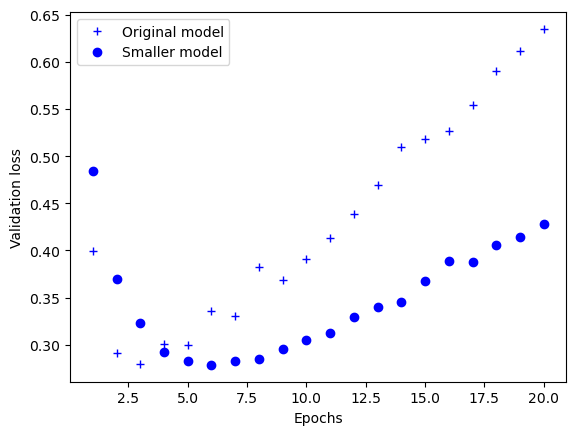

In [6]:
from matplotlib import pyplot as plt

epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

To be sure, let's try now with an even bigger model.

In [7]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [8]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - acc: 0.7653 - loss: 0.4905 - val_acc: 0.8574 - val_loss: 0.3395
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.8863 - loss: 0.2764 - val_acc: 0.8432 - val_loss: 0.3570
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.9168 - loss: 0.2086 - val_acc: 0.8796 - val_loss: 0.2948
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.9321 - loss: 0.1715 - val_acc: 0.8820 - val_loss: 0.2844
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.9541 - loss: 0.1238 - val_acc: 0.8827 - val_loss: 0.3059
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.9711 - loss: 0.0852 - val_acc: 0.8768 - val_loss: 0.3902
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.9741 - loss: 0.0767 - val_acc: 0.8796 - val_loss: 0.3215
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.9874 - loss: 0.0433 - val_acc: 0.8797 - val_loss: 0.4214
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.9890

If we compare it to the original model, we'll notice how the bigger model incurs in more overfitting than the original.

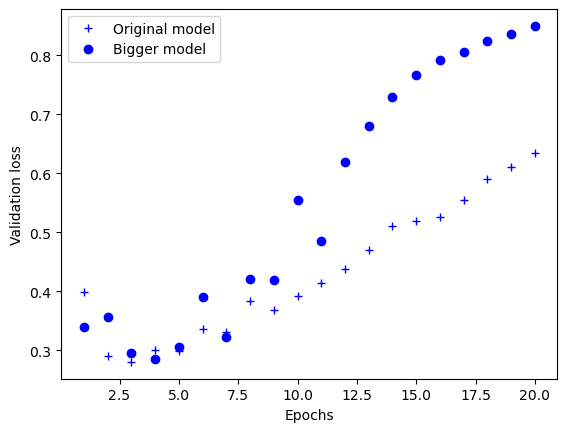

In [9]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

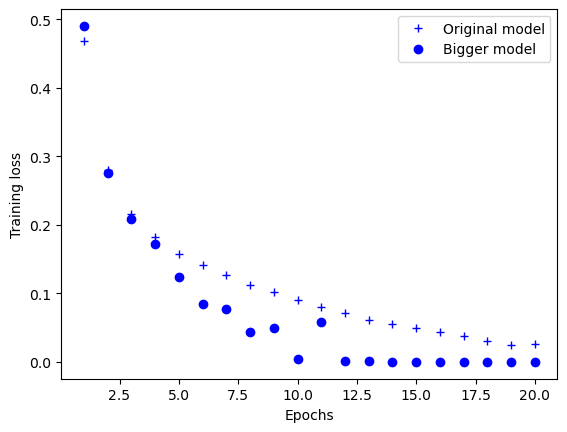

In [10]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

### Weight regularization

We'll now see some methods that help reduce the overfitting. One of these methods is the weight regularisation.

We'll use the L2 regularisation, but there are different types, such as the L1 or the L1+L2, also known as elastic regularisation.

As we said, we'll use the L2 regularisation and a factor of 0.001, but you can try different values and see its effect. 

In [11]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [13]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.8169 - loss: 0.5246 - val_acc: 0.8766 - val_loss: 0.4047
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8956 - loss: 0.3439 - val_acc: 0.8855 - val_loss: 0.3490
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9132 - loss: 0.2908 - val_acc: 0.8885 - val_loss: 0.3334
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9234 - loss: 0.2663 - val_acc: 0.8844 - val_loss: 0.3392
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9300 - loss: 0.2485 - val_acc: 0.8818 - val_loss: 0.3473
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9334 - loss: 0.2408 - val_acc: 0.8824 - val_loss: 0.3458
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9387 - loss: 0.2315 - val_acc: 0.8831 - val_loss: 0.3523
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9409 - loss: 0.2245 - val_acc: 0.8760 - val_loss: 0.3691
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9442 - loss:

Let's plot the training curves and see what the regularisation did:

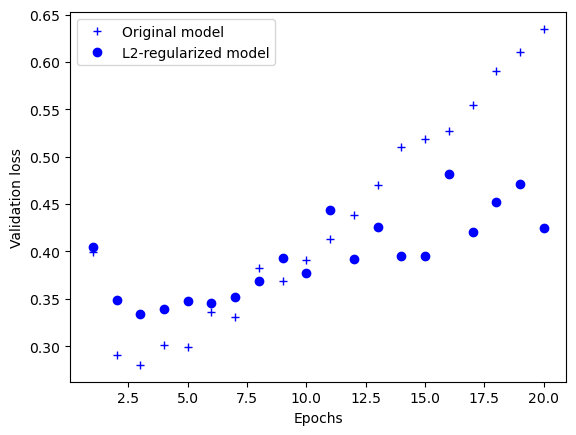

In [14]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Note how it was able to reduce the overfitting.

To use the L1 or L1+L2 regularisations you can use these classes:

```
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)
```

### Dropout

Another regularisation method is called Dropout, as you already saw in the theoretical documents of the course, and it's wildly used in practice.

We'll set the dropout rate to 0.5, but once again, feel free to try different values and see it's effect on the model behaviour:

In [15]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])


In [16]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - acc: 0.6872 - loss: 0.5894 - val_acc: 0.8564 - val_loss: 0.4532
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8072 - loss: 0.4463 - val_acc: 0.8829 - val_loss: 0.3370
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8570 - loss: 0.3633 - val_acc: 0.8877 - val_loss: 0.2858
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8873 - loss: 0.3048 - val_acc: 0.8885 - val_loss: 0.2809
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9016 - loss: 0.2659 - val_acc: 0.8894 - val_loss: 0.2760
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9166 - loss: 0.2375 - val_acc: 0.8865 - val_loss: 0.2909
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9281 - loss: 0.2094 - val_acc: 0.8845 - val_loss: 0.3067
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9321 - loss: 0.1983 - val_acc: 0.8857 - val_loss: 0.3069
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9372 - loss:

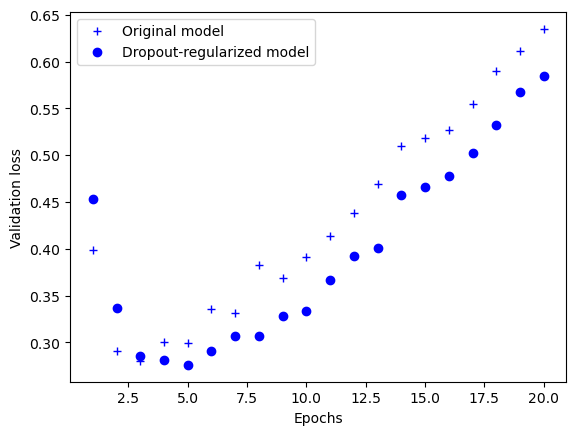

In [17]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Note how we were also able to reduce the overfitting using this technique.

### Early Stopping

The last method to deal with overfitting we'll see in this notebook is a technique called EarlyStopping. This technique does nothing but stop the training of the model once some condition is met. 

For example, it can monitor the validation loss and stop the training after 5 epochs without improvement. You have more information [here](https://keras.io/api/callbacks/early_stopping/).

Let's see how to implement it with Keras:

In [18]:
from keras.callbacks import EarlyStopping

In [19]:
es_model = models.Sequential()
es_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
es_model.add(layers.Dropout(0.5))
es_model.add(layers.Dense(16, activation='relu'))
es_model.add(layers.Dropout(0.5))
es_model.add(layers.Dense(1, activation='sigmoid'))

es_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])


In [20]:
# set up the early stopping
callbacks = [EarlyStopping(monitor='val_loss', patience=3)]


es_model_hist = es_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test),
                             callbacks=callbacks) # add the callbacks

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - acc: 0.6785 - loss: 0.6017 - val_acc: 0.8624 - val_loss: 0.4548
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8104 - loss: 0.4551 - val_acc: 0.8825 - val_loss: 0.3505
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8614 - loss: 0.3710 - val_acc: 0.8846 - val_loss: 0.3060
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8867 - loss: 0.3158 - val_acc: 0.8896 - val_loss: 0.2809
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9041 - loss: 0.2767 - val_acc: 0.8896 - val_loss: 0.2787
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9146 - loss: 0.2447 - val_acc: 0.8891 - val_loss: 0.2826
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9249 - loss: 0.2229 - val_acc: 0.8865 - val_loss: 0.2958
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9309 - loss: 0.2033 - val_acc: 0.8845 - val_loss: 0.3122


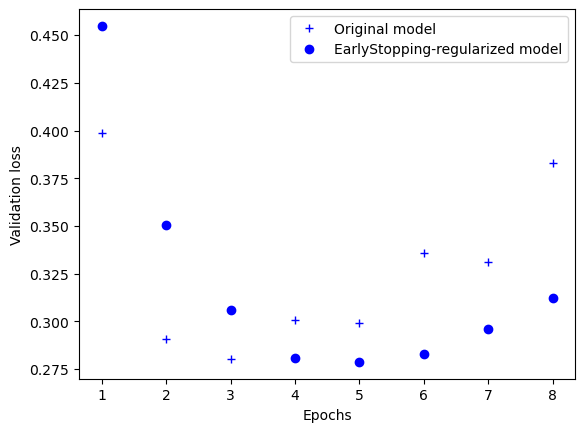

In [21]:
es_model_val_loss = es_model_hist.history['val_loss']

plt.plot(epochs[:len(es_model_val_loss)], original_val_loss[:len(es_model_val_loss)], 'b+', label='Original model')
plt.plot(epochs[:len(es_model_val_loss)], es_model_val_loss, 'bo', label='EarlyStopping-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Notice how the callback stopped the training in epoch 8, after the model performed 3 epochs with no improvement on the validation loss. This method just prevents the network to continue training, which sometimes is somehow limited, since it could be possible to reach a better result continuing the training with some regularisation or dropout.

All these methods can be used individually or together.